# UBANCODE stage 1 solution
####To solve the problem of detecting 3 types of images we used the dataset provided by the organizators + we added additional open source images to train the detection model.

In [ ]:
!pip install ultralytics==8.0.134

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_KEY")
project = rf.workspace("egorgladilin").project("urban_cv")
dataset = project.version(11).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to urban_cv-11 in yolov8:: 100%|██████████| 2309/2309 [00:00<00:00, 3232.93it/s]


####Before choosing yolov8s we had tested severall other detection model like faster-rcnn and detr, but we were unsatisfied with the outcomes. Finally our decided to choose one of yolo models and stopped at choosing yolov8s since this model is state of art solution and has optimal number of parameters and optimal time of convergence and producing inference.

In [ ]:
model = YOLO('yolov8s')

In [ ]:
model.train(data = f'{dataset.location}/data.yaml', task = 'detect', batch=4, epochs=20,plots=True, optimizer = 'RAdam', imgsz= 1080)

New https://pypi.org/project/ultralytics/8.0.198 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/urban_cv-11/data.yaml, epochs=20, patience=50, batch=4, imgsz=1080, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=RAdam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classe

####After training the model we chose model with the best score. The next important step was finding optimal inference parameters as it significantly influenced the final score. We increased number of maximum detections and decreased confidence and slitely decreased iou so that the model could predict more boxes, but remained capable of choosing the best abd drop other.

####Below you can see our metrics and inference sample.

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
model.val(task='detect', data=f'{dataset.location}/data.yaml',iou = 0.6, max_det = 400, conf = 0.1, imgsz = 1080)

WARNING ⚠️ imgsz=[1080] must be multiple of max stride 32, updating to [1088]
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients
val: Scanning /content/urban_cv-11/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/urban_cv-11/valid/images/0000006838building_jpg.rf.abcffe0d7dcf751ac2382ae23229fca0.jpg: 3 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<00:00,  4.17s/it]
                   all         39       6823      0.832      0.794      0.871      0.648
                 empty         39       1594      0.845      0.855      0.914      0.701
                filled         39       2389      0.824       0.74      0.829      0.599
                window         39       2840      0.828      0.787      0.871      0.645

ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7cea3a142320>
fitness: 0.6706898053190067
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.70142,     0.59926,     0.64451])
names: {0: 'empty', 1: 'filled', 2: 'window'}
plot: True
results_dict: {'metrics/precision(B)': 0.8323646054994133, 'metrics/recall(B)': 0.7939410612617617, 'metrics/mAP50(B)': 0.8713028575556875, 'metrics/mAP50-95(B)': 0.6483994661815977, 'fitness': 0.6706898053190067}
save_dir: PosixPath('runs/detect/val5')
speed: {'preprocess': 18.94089503166003, 'inference': 60.203099862123146, 'loss': 0.002408638978615785, 'postprocess': 7.008277452909029}

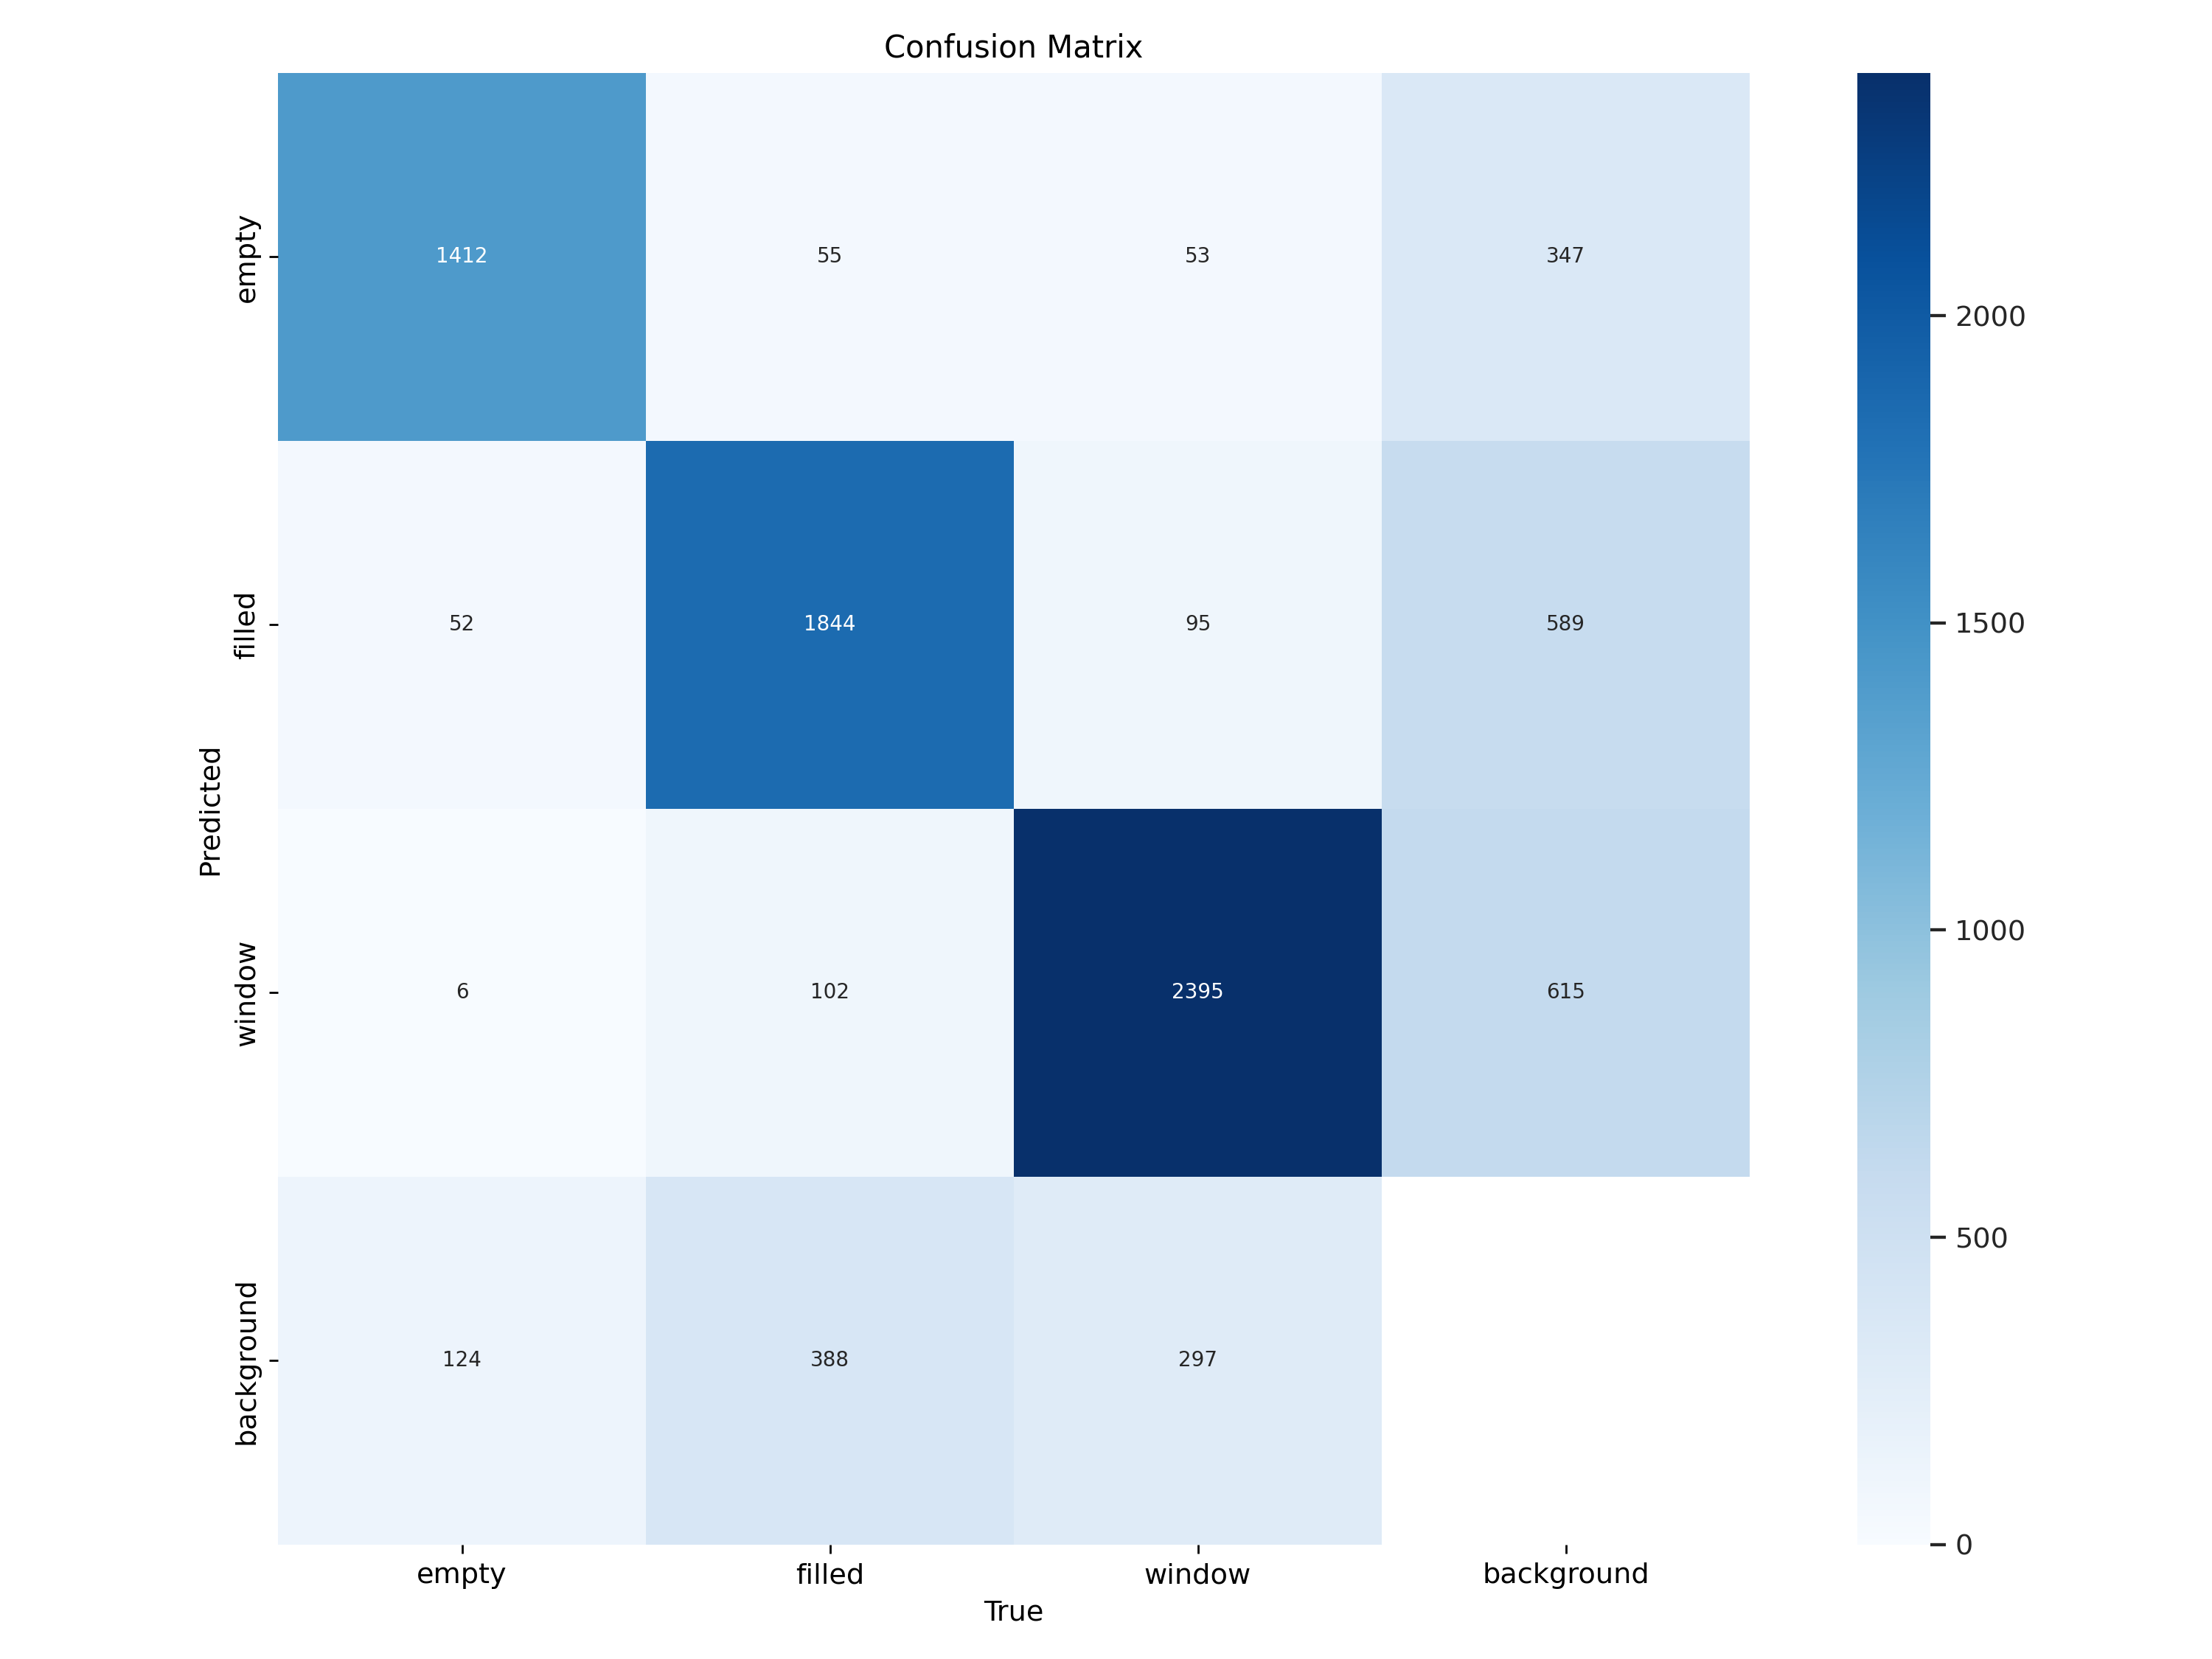

In [ ]:
Image('/content/runs/detect/val5/confusion_matrix.png')

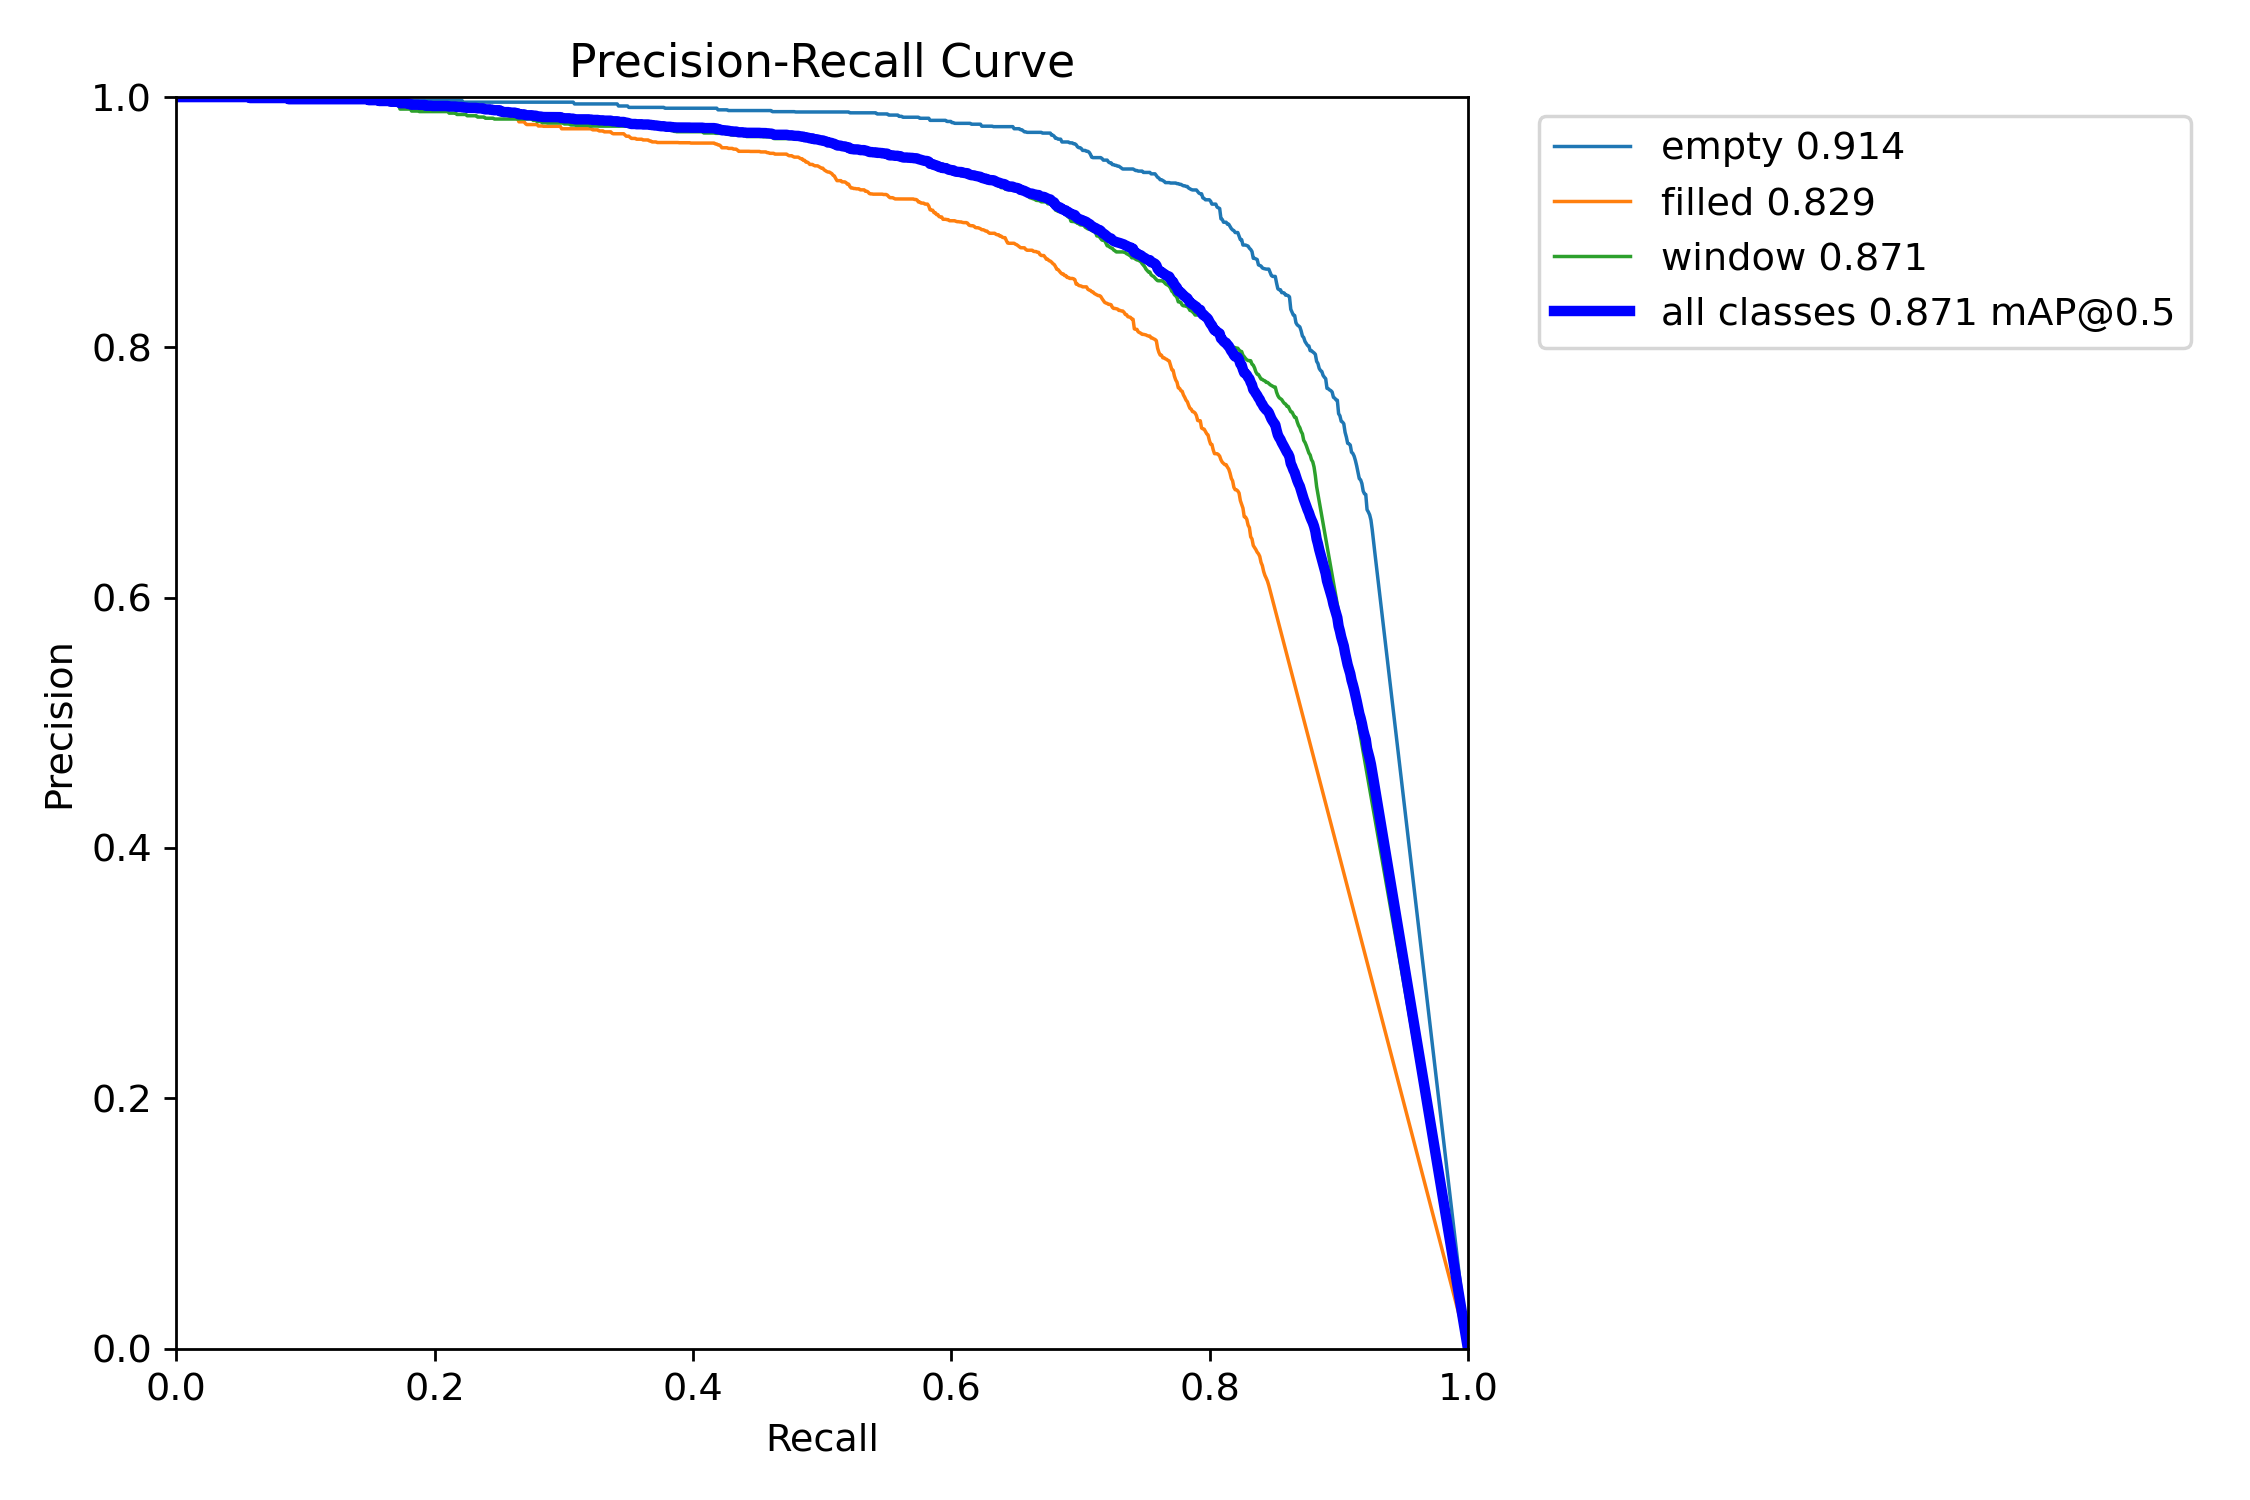

In [ ]:
Image('/content/runs/detect/val5/PR_curve.png')

In [ ]:
model.predict(source = '/content/urban_cv-11/train/images/0000010630building_jpg.rf.17d72b2fa2eee0354deaeceb5f3b066b.jpg', save = True, save_txt=True)


image 1/1 /content/urban_cv-11/train/images/0000010630building_jpg.rf.17d72b2fa2eee0354deaeceb5f3b066b.jpg: 1152x1152 140 emptys, 91 filleds, 69 windows, 43.0ms
Speed: 10.7ms preprocess, 43.0ms inference, 4.6ms postprocess per image at shape (1, 3, 1152, 1152)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'empty', 1: 'filled', 2: 'window'}
 orig_img: array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [ 92,  96,  97],
         [102, 106, 107],
         [100, 104, 105]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   

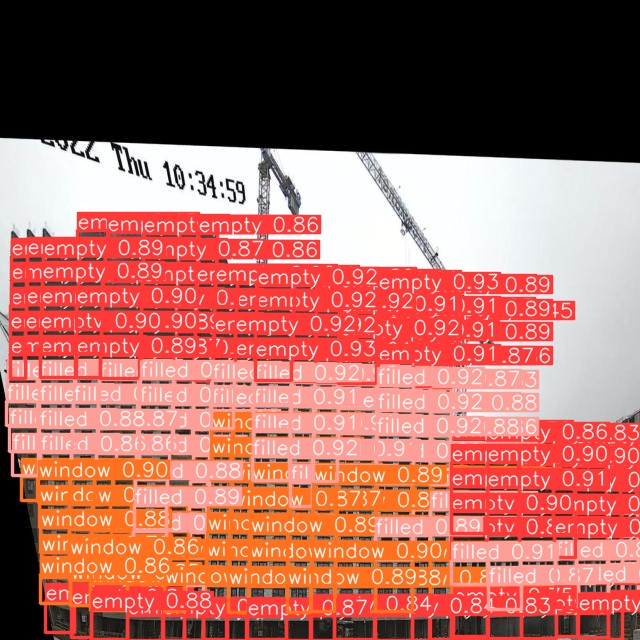

In [ ]:
Image('/content/runs/detect/predict/0000010630building_jpg.rf.17d72b2fa2eee0354deaeceb5f3b066b.jpg')

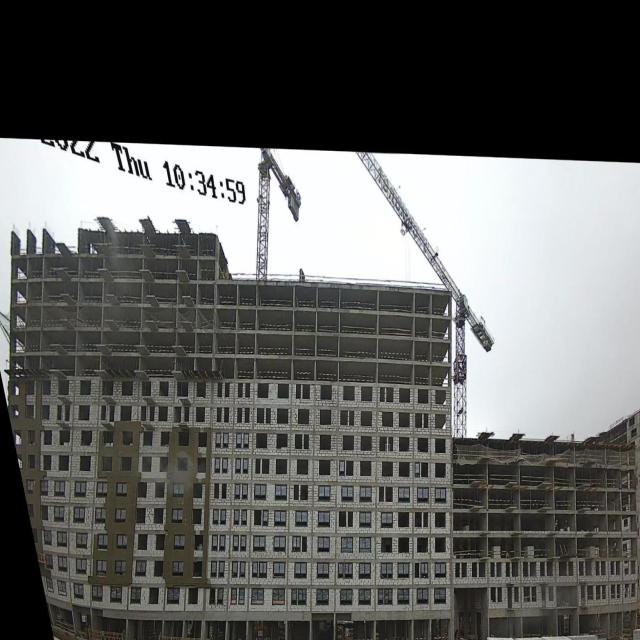

In [ ]:
Image('/content/urban_cv-11/train/images/0000010630building_jpg.rf.17d72b2fa2eee0354deaeceb5f3b066b.jpg')